In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data/bm.csv').to_numpy()

In [3]:
random_state = np.random.randint(1, 1001)
X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, 2], test_size=0.1, random_state=random_state)

In [4]:
# this refers to indices of X_train, the r here is filled with random indices of a pair of x and y values
from sklearn.tree import DecisionTreeClassifier
from numpy.random import default_rng
from sklearn.metrics import accuracy_score
rng = default_rng()

n = 5000
r = np.zeros([n, 100], dtype=int)
XX = np.zeros([n, 2, 100])

# boostrap sampling and training 100 trees
trees = []
for i in range (100):
    r[:, i] = rng.choice(n, size=n, replace=True)
    XX[:, :, i] = X_train[r[:, i], :]
    clf_tree = DecisionTreeClassifier(max_depth=5, criterion='gini')
    clf_tree.fit(XX[:, :, i], y_train[r[:, i]])
    trees.append(clf_tree)

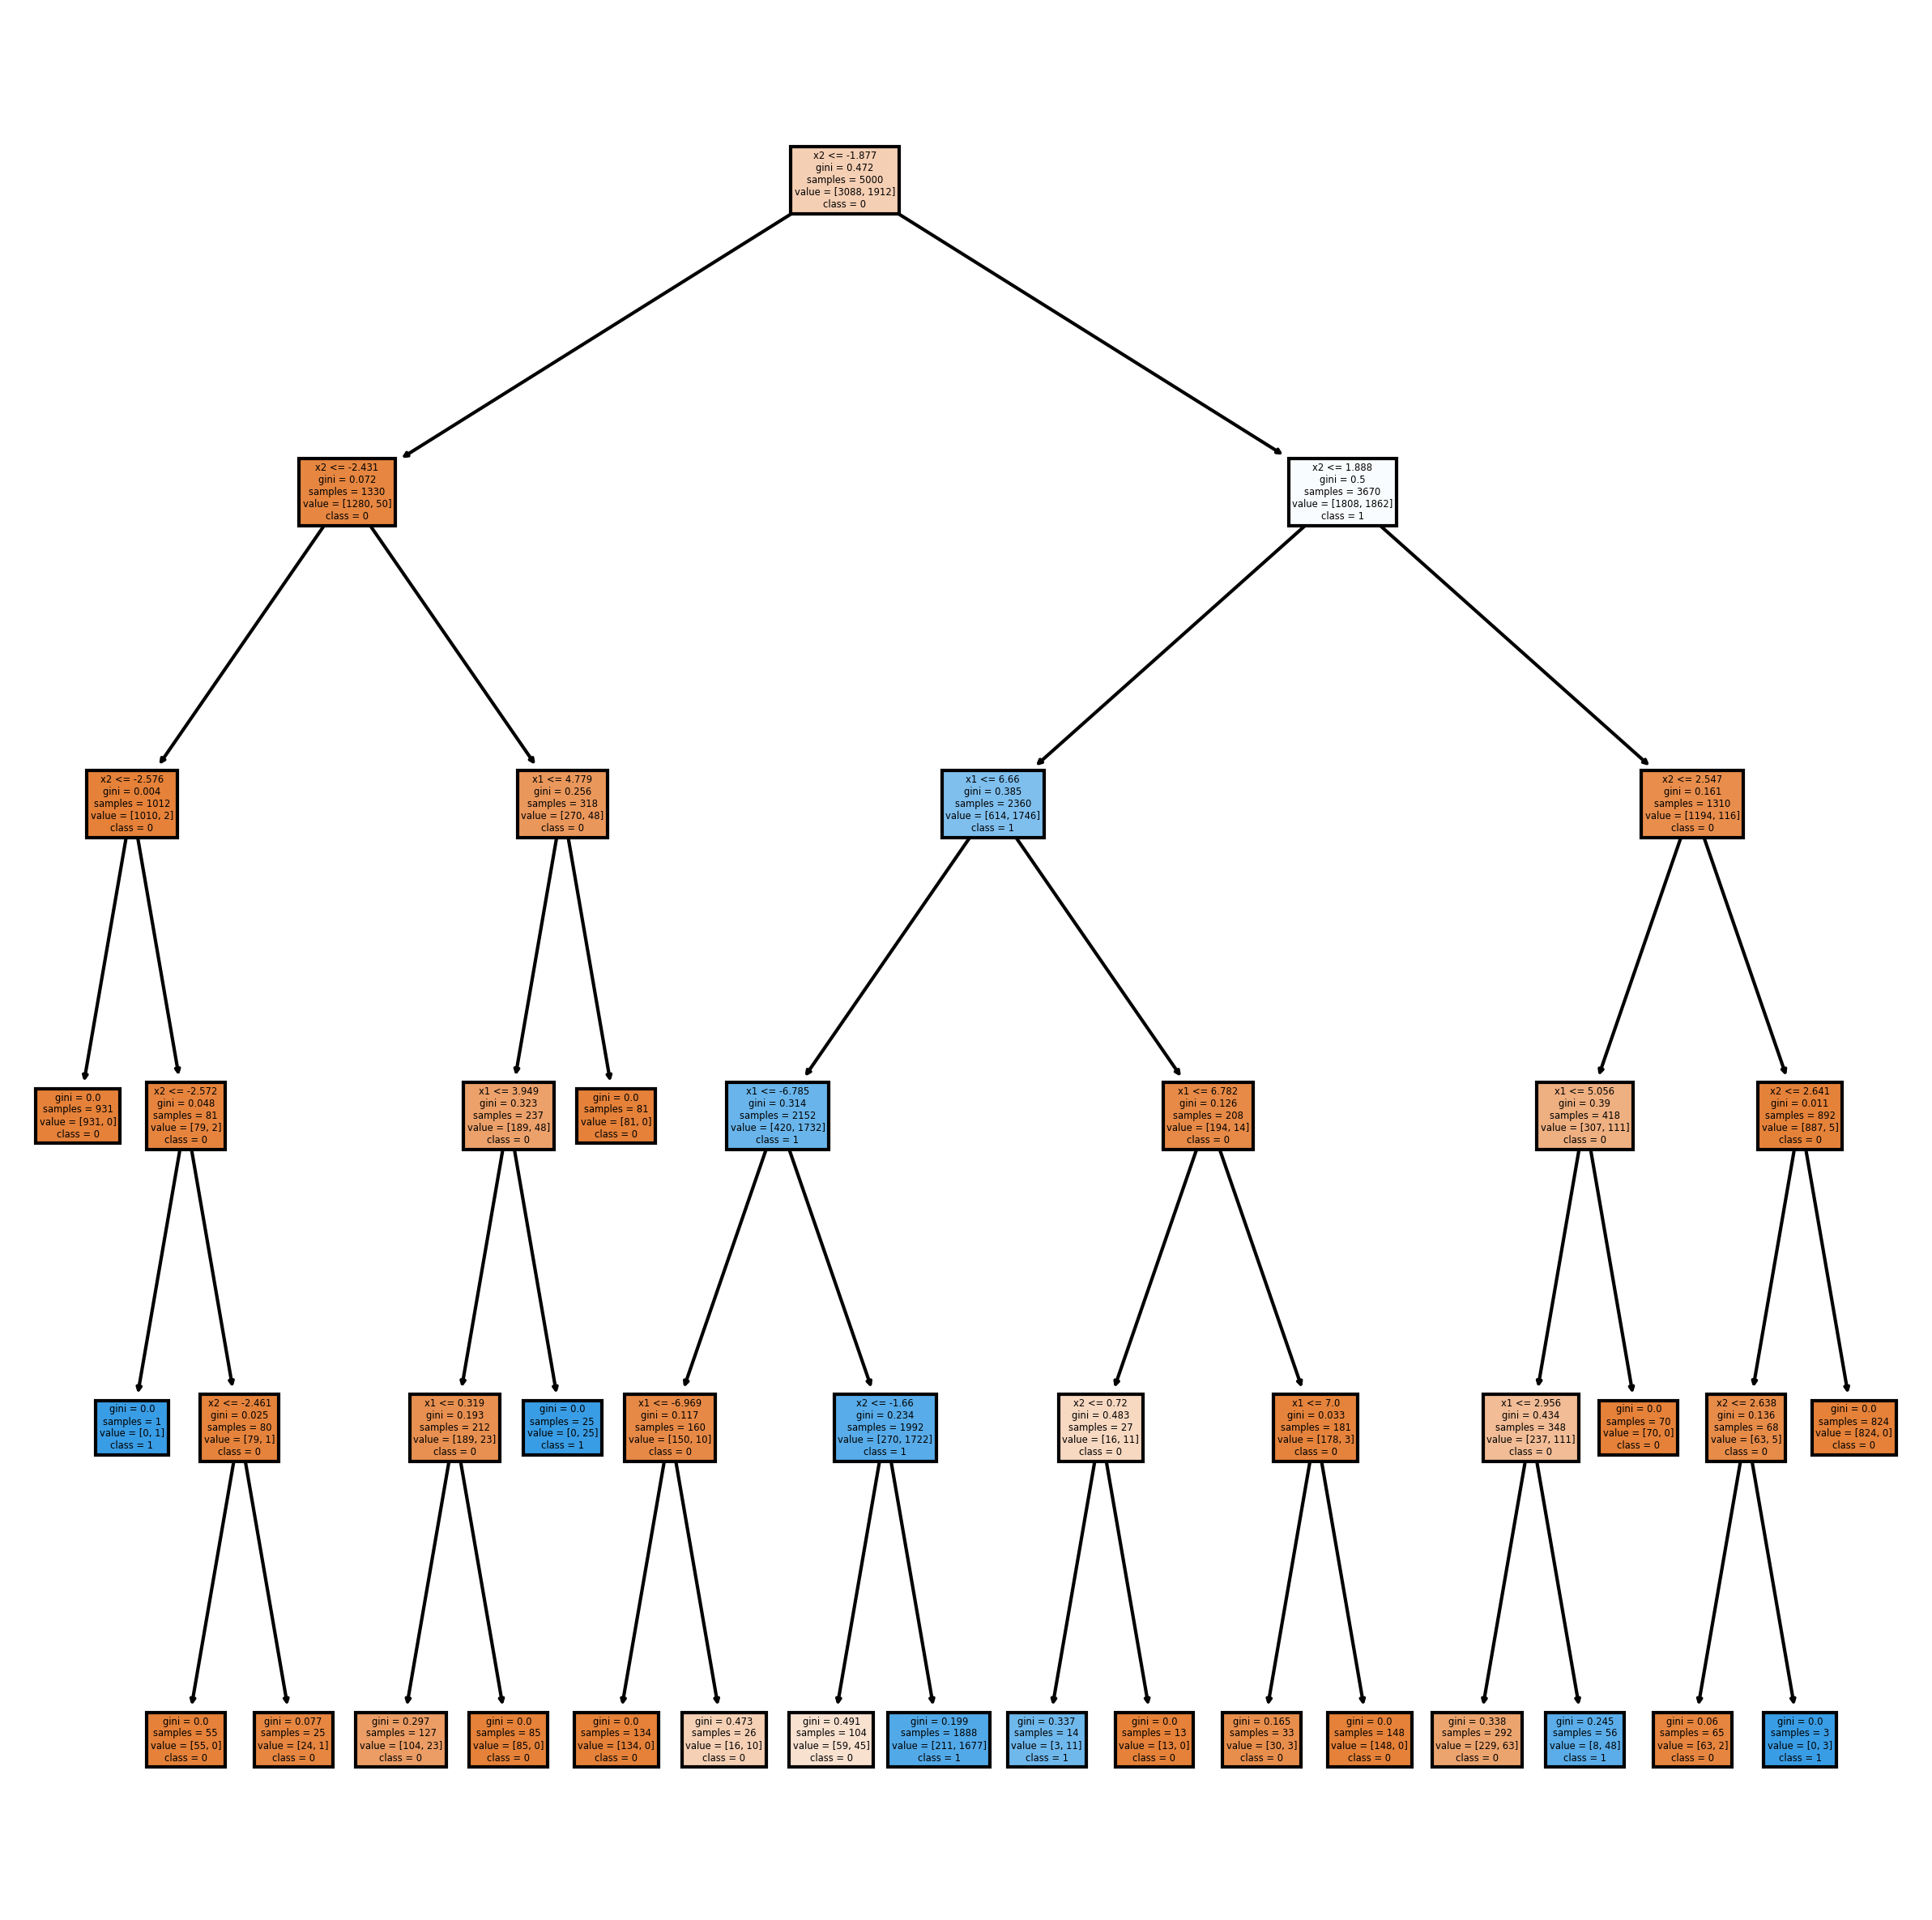

In [5]:

from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(trees[0],
               feature_names = ['x1','x2'],
               class_names=['0','1'],
               filled = True);


In [12]:
# testing level nodes
import Functions as f
one_tree = trees[0]
level_1_nodes=  f.get_nodes_at_some_depth(one_tree, 1)

In [14]:
gini_impurities = one_tree.tree_.impurity[level_1_nodes]
avg_gini = np.mean(gini_impurities)

I think I will use the 'pruning' method (stopping when the impurity is not significant)

note: classification error should only be used for performance, not for training.
note: probably the best way to decide on the max_depth to use gini impurity measures and see after how many depth levels the change starts being insignificant. That's the place to stop

In [7]:
predictions = np.zeros([X_test.shape[0], 100], dtype=int)
pred_list = []
for i in range(len(trees)):
    prediction = trees[i].predict(X_test)
    predictions[:, i] = prediction
    pred_list.append(prediction)

In [8]:
accuracies=[]
for pred in pred_list:
    accuracies.append(accuracy_score(y_test, pred))

In [9]:
# implement the gini impurity measure

In [10]:
n_nodes = []
left_child = []
right_child = []
for tree in trees:
    n_nodes.append(tree.tree_.node_count)
    left_child.append(tree.tree_.children_left)
    right_child.append(tree.tree_.children_right)